In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("seaborn-whitegrid")

In [3]:
data1 = pd.read_feather("gamma345")
data2 = pd.read_feather("gamma7")
data3 = pd.read_feather("gamma10")
data4 = pd.read_feather("gamma14")
input_vars1 = pd.read_csv("input_parameters345.csv")
input_vars2 = pd.read_csv("input_parameters7.csv")
input_vars3 = pd.read_csv("input_parameters10.csv")
input_vars4 = pd.read_csv("input_parameters14.csv")
os = pd.read_csv("output_names.csv")

In [4]:
data2.o0 = data2.o0+48
data3.o0 = data3.o0+48+16
data4.o0 = data4.o0+48+16+11
data = pd.concat((data1,data2))
data = pd.concat((data,data3))
data = pd.concat((data,data4))

input_vars = pd.concat((input_vars1,input_vars2))
input_vars = pd.concat((input_vars,input_vars3))
input_vars = pd.concat((input_vars,input_vars4))
input_vars = input_vars.reset_index()

In [79]:
def normalise(arr):
    arrmax = np.max(arr)
    arrmin = np.min(arr)
    
    arrnorm = (arr - arrmin) / (arrmax - arrmin)
    
    return arrnorm

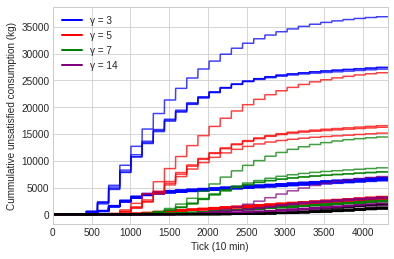

In [39]:
# dict to store relevant indices

# x vector to plot            
x = np.linspace(0,4319,4320) 
colors = ['blue', 'red', 'green','purple','black']

input_vars_filtered = input_vars

gammas = [3,5,7,10,14]
for lala in range(len(gammas)):  
    i=gammas[lala]
    for j in input_vars_filtered[input_vars_filtered.gamma==i].index:
        plt.plot( x, data.o1[data.o0==j],color=colors[lala], alpha=.75)

            
# graph layout
# plt.title("")
plt.ylabel("Cumulative unsatisfied consumption (kg)")
plt.xlabel("Tick (10 min)")
plt.xlim([0,4320])

from matplotlib.lines import Line2D

colors = ['blue', 'red', 'green','purple','black']
lines = [Line2D([0], [0], color=c, linewidth=2, linestyle='-') for c in colors]
labels = ['γ = 3', 'γ = 5', 'γ = 7', 'γ = 14']
plt.legend(lines, labels)

# plt.ylim([-100,7500]);
# plt.savefig("/home/daan/Desktop/unsatisfied_consumption.png")


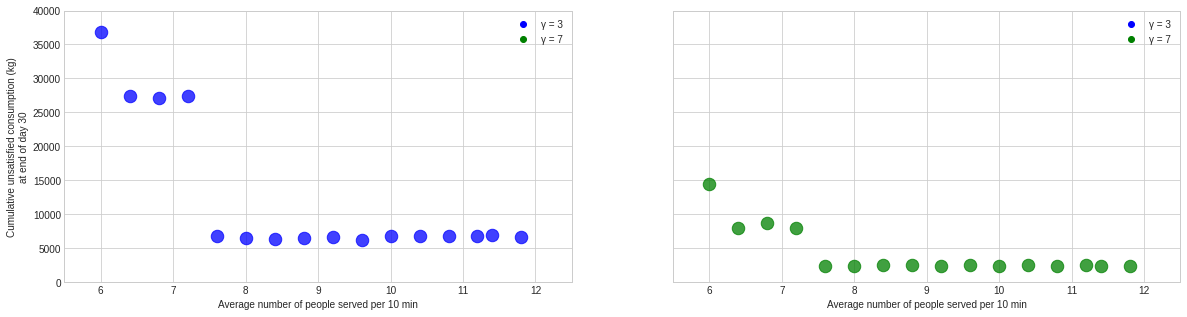

In [124]:
from matplotlib.lines import Line2D

# x vector to plot            
x = np.linspace(0,4319,4320) 
colors = ['blue', 'green']
labels = ['γ = 3','γ = 7']

fig,ax = plt.subplots(1,2,figsize=(20,5),sharey=True)

input_vars_filtered = input_vars

for i in [6.0,6.4,6.8,7.2,7.6,8.0,8.4,8.8,9.2,9.6,10,10.4,10.8,11.2,11.4,11.8]:    

    for j in input_vars_filtered[input_vars_filtered.parallel_served_full==i].index:
        if input_vars_filtered.gamma[j]==3:
            ax[0].plot( i, data.o1[data.o0==j].iloc[-1],marker='o',color='blue',markersize=12.5 ,alpha=.75)
        elif input_vars_filtered.gamma[j]==7:
            ax[1].plot( i, data.o1[data.o0==j].iloc[-1],marker='o',color='green',markersize=12.5, alpha=.75)

            
lines = [Line2D([0], [0], color=c, linewidth=10,marker='o' ,linestyle='None') for c in colors]
        
for a in ax:
    a.set_xlim([5.5,12.5])
    a.set_ylim([0,40000])
    
    a.set_xlabel("Average number of people served per 10 min")
    a.legend(lines, labels)
    a.legend(lines,labels)
ax[0].set_ylabel("Cumulative unsatisfied consumption (kg)\nat end of day 30");


plt.savefig("/home/daan/Desktop/calibration_sc.png")

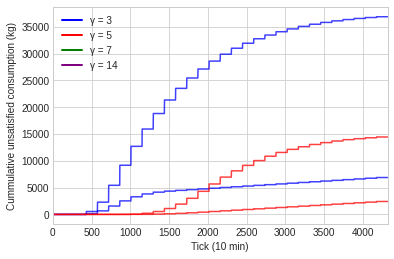

In [123]:
# dict to store relevant indices

# x vector to plot            
x = np.linspace(0,4319,4320) 
colors = ['blue', 'red', 'green','purple','black']

input_vars_filtered = input_vars

gammas = [3,7]
for lala in range(len(gammas)):  
    i=gammas[lala]
    for j in input_vars_filtered[input_vars_filtered.gamma==i].index:
        if input_vars_filtered.parallel_served_full[j]==7.6 or input_vars_filtered.parallel_served_full[j]==6.0:
            plt.plot( x, data.o1[data.o0==j],color=colors[lala], alpha=.75)

            
# graph layout
# plt.title("")
plt.ylabel("Cummulative unsatisfied consumption (kg)")
plt.xlabel("Tick (10 min)")
plt.xlim([0,4320])

from matplotlib.lines import Line2D

colors = ['blue', 'red', 'green','purple','black']
lines = [Line2D([0], [0], color=c, linewidth=2, linestyle='-') for c in colors]
labels = ['γ = 3', 'γ = 5', 'γ = 7', 'γ = 14']
plt.legend(lines, labels)

# plt.ylim([-100,7500]);
# plt.savefig("/home/daan/Desktop/unsatisfied_consumption.png")
